In [6]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import drive

In [7]:
# Mount Google Drive to access the saved model
drive.mount('/content/drive')

drive_model_path = '/content/drive/My Drive/image_classifier.h5'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
loaded_model = load_model(drive_model_path)
print("Model loaded successfully!")

class_names = ['cars', 'bicycles', 'mountains', 'deer']  # Doule-check classes

Model loaded successfully!


In [13]:
# Defining function to classify a new image
def classify_new_image(img_path, tf_model, class_names):

    # Loading and preprocessing image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize

    # Predicting class
    predictions = tf_model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_names[predicted_class_index]

    # Displaying image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class_name}")
    plt.show()

    return predicted_class_name

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


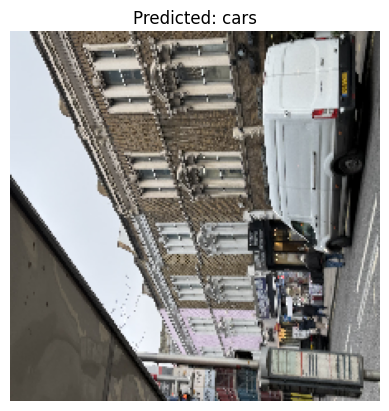

Predicted Class: cars


In [15]:
# Classifying image & printing predicted class
new_image_path = '/content/drive/My Drive/IMG_6550.jpeg'

predicted_class = classify_new_image(new_image_path, loaded_model, class_names)

print(f"Predicted Class: {predicted_class}")